# Beer Stocks

https://en.wikipedia.org/wiki/Beer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY','BUD','STZ','KNBWY', 'TAP', 'SAM']
start = '2022-02-28'
end = '2022-03-25'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,BUD,KNBWY,SAM,SPY,STZ,TAP
Date,,,,,,
2022-02-28,61.235043,16.790001,383.459991,435.277771,214.916061,51.432457
2022-03-01,58.471889,16.180000,379.959991,428.648376,212.952499,49.677959
2022-03-02,58.372849,15.930000,393.709991,436.533875,215.115433,50.476349
2022-03-03,57.600353,16.059999,391.679993,434.360596,217.577347,50.387638
2022-03-04,55.332390,15.990000,376.130005,430.831573,216.949417,50.516735


In [3]:
df.tail()

,BUD,KNBWY,SAM,SPY,STZ,TAP
Date,,,,,,
2022-03-18,60.026779,15.49,401.619995,444.519989,225.192413,52.592224
2022-03-21,59.452358,15.44,397.920013,444.390015,225.112686,52.284378
2022-03-22,59.680145,15.23,407.010010,449.589996,226.976578,52.512779
2022-03-23,58.145061,15.04,389.179993,443.799988,223.787018,52.135418
2022-03-24,58.561020,15.06,392.640015,450.489990,225.720688,52.552498


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

0 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
BUD: 12500.0
KNBWY: 12500.0
SAM: 12500.0
SPY: 12500.0
STZ: 12500.0
TAP: 12500.0


In [8]:
print('Number of Shares:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
BUD: 204
KNBWY: 744
SAM: 32
SPY: 28
STZ: 58
TAP: 243


In [9]:
print('Beginning Value:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
BUD: $12491.95
KNBWY: $12491.76
SAM: $12270.72
SPY: $12187.78
STZ: $12465.13
TAP: $12498.09


In [10]:
print('Current Value:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
BUD: $11946.45
KNBWY: $11204.64
SAM: $12564.48
SPY: $12613.72
STZ: $13091.8
TAP: $12770.26


In [11]:
result = []
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $74191.35


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: BUD: -4.37%
Holding Period Return: KNBWY: -10.299999999999999%
Holding Period Return: SAM: 2.39%
Holding Period Return: SPY: 3.49%
Holding Period Return: STZ: 5.029999999999999%
Holding Period Return: TAP: 2.18%


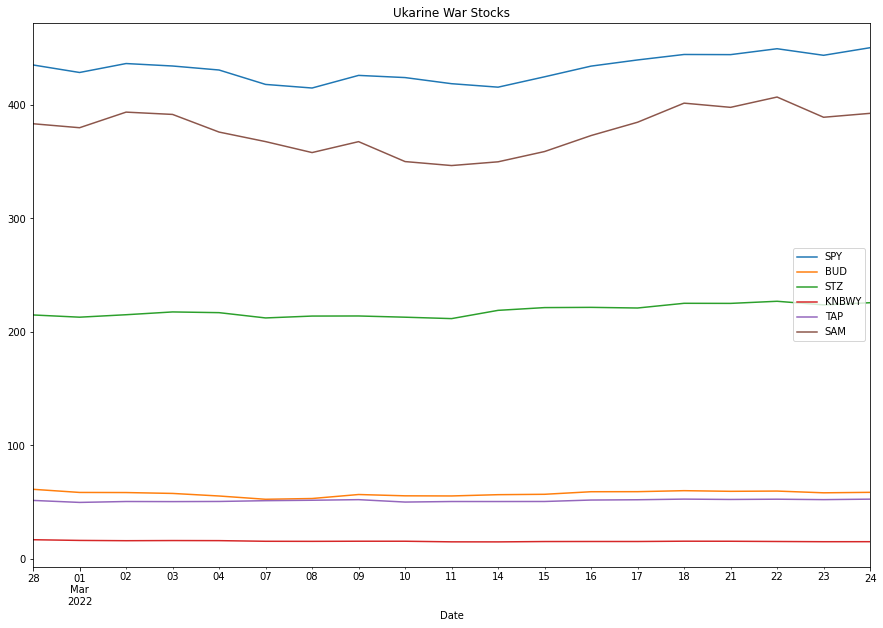

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Ukarine War Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

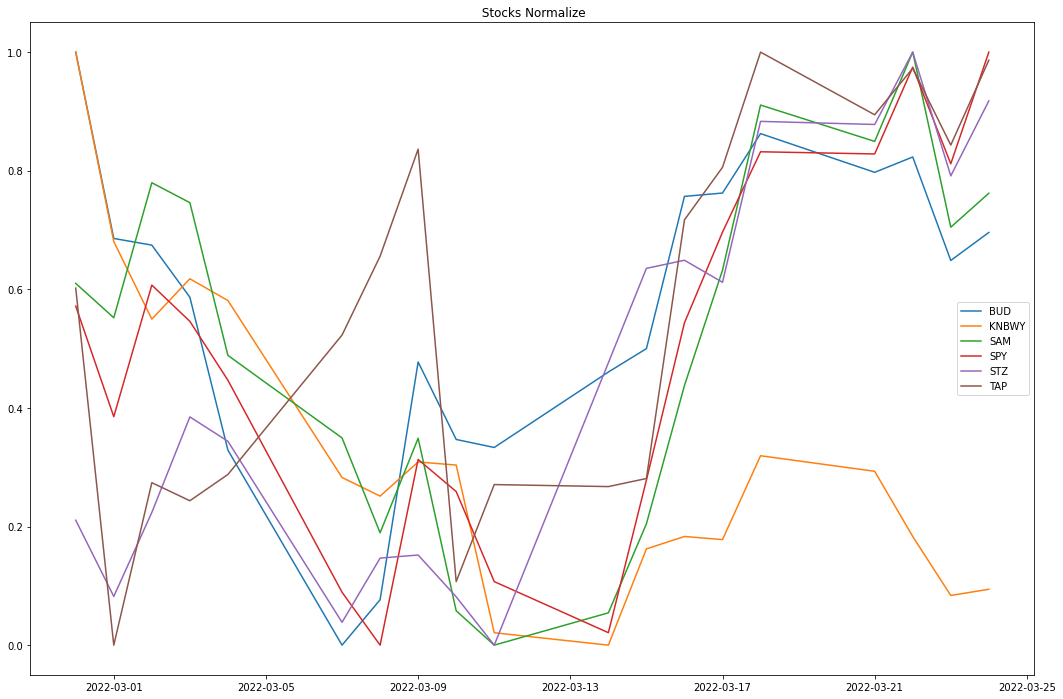

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

BUD       52.440487
KNBWY     14.880000
SAM      346.619995
SPY      414.960876
STZ      211.696609
TAP       49.677959
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 450.489990234375
BUD: 61.235042572021484
STZ: 226.97657775878906
KNBWY: 16.790000915527344
TAP: 52.59222412109375
SAM: 407.010009765625


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,BUD Return,STZ Return,KNBWY Return,TAP Return,SAM Return
Date,,,,,,
2022-03-01,-0.015230,-0.045124,-0.009136,-0.036331,-0.034113,-0.009127
2022-03-02,0.018396,-0.001694,0.010157,-0.015451,0.016071,0.036188
2022-03-03,-0.004978,-0.013234,0.011445,0.008161,-0.001757,-0.005156
2022-03-04,-0.008125,-0.039374,-0.002886,-0.004359,0.002562,-0.039701


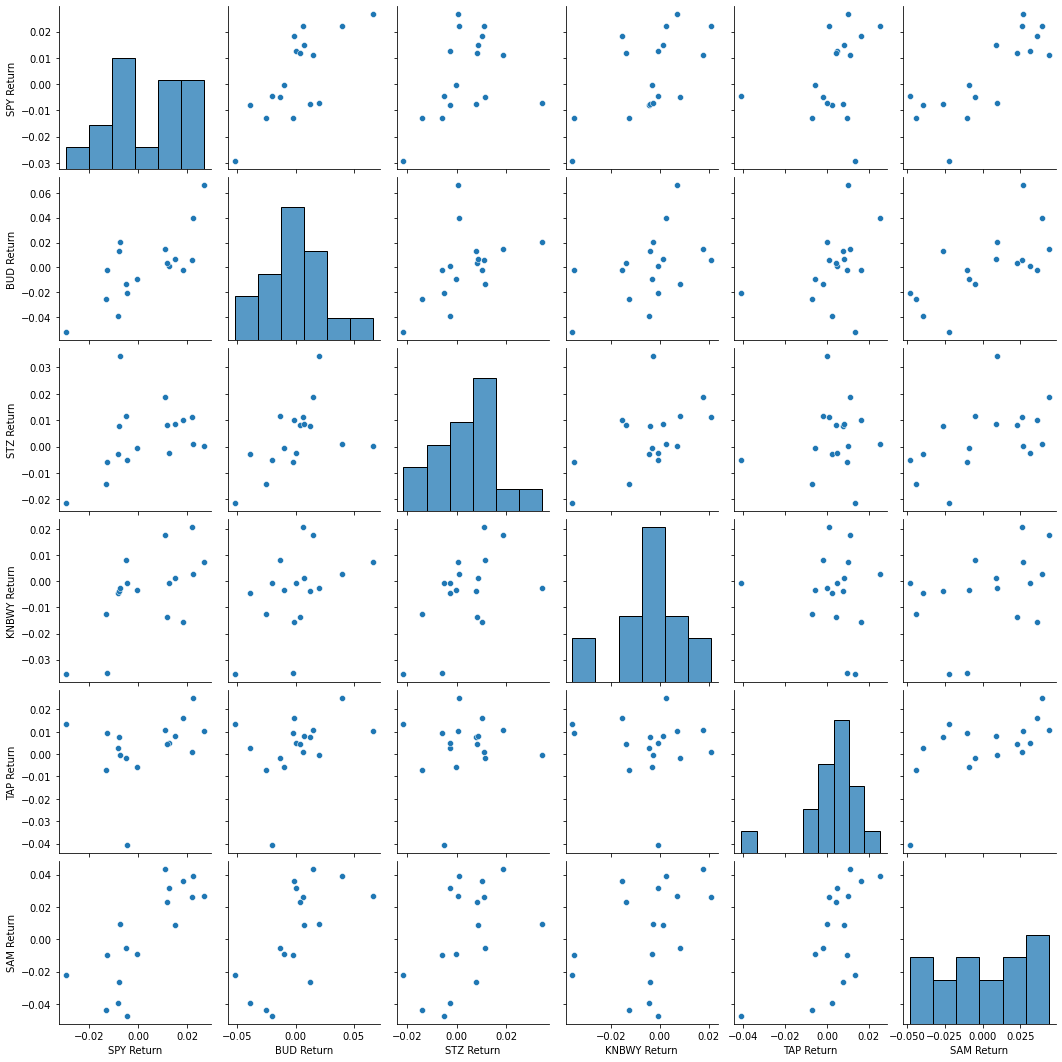

In [19]:
sns.pairplot(returns[1:] )

In [20]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return     2022-03-09
BUD Return     2022-03-09
STZ Return     2022-03-14
KNBWY Return   2022-03-15
TAP Return     2022-03-16
SAM Return     2022-03-18
dtype: datetime64[ns]


In [21]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return     2022-03-07
BUD Return     2022-03-07
STZ Return     2022-03-07
KNBWY Return   2022-03-01
TAP Return     2022-03-10
SAM Return     2022-03-10
dtype: datetime64[ns]


In [22]:
returns.corr()

,SPY Return,BUD Return,STZ Return,KNBWY Return,TAP Return,SAM Return
SPY Return,1.000000,0.763565,0.427574,0.658982,0.381562,0.778240
BUD Return,0.763565,1.000000,0.530726,0.562602,0.478498,0.651131
STZ Return,0.427574,0.530726,1.000000,0.575678,0.206944,0.507728
KNBWY Return,0.658982,0.562602,0.575678,1.000000,0.151478,0.381853
TAP Return,0.381562,0.478498,0.206944,0.151478,1.000000,0.557978
SAM Return,0.778240,0.651131,0.507728,0.381853,0.557978,1.000000


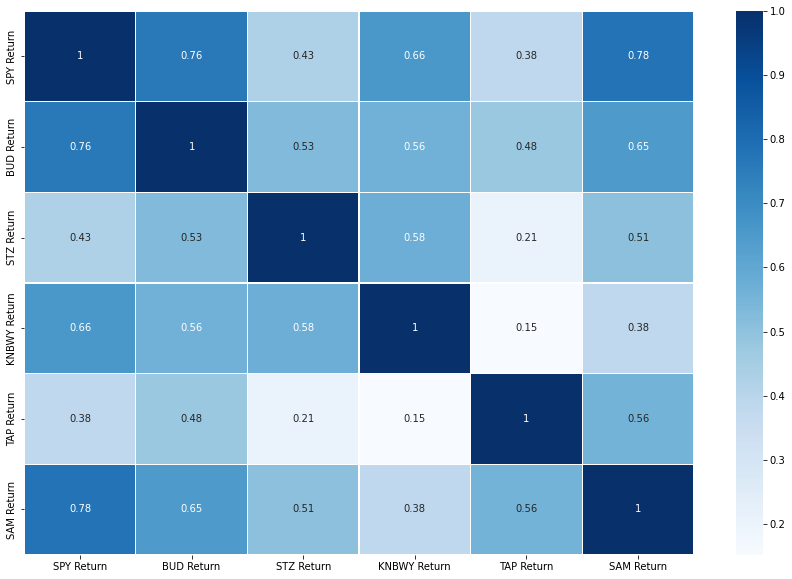

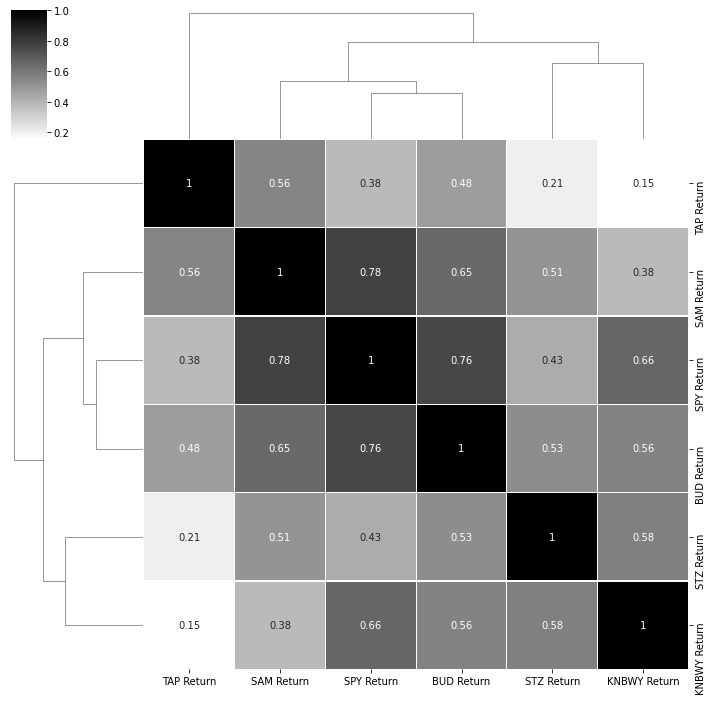

In [23]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

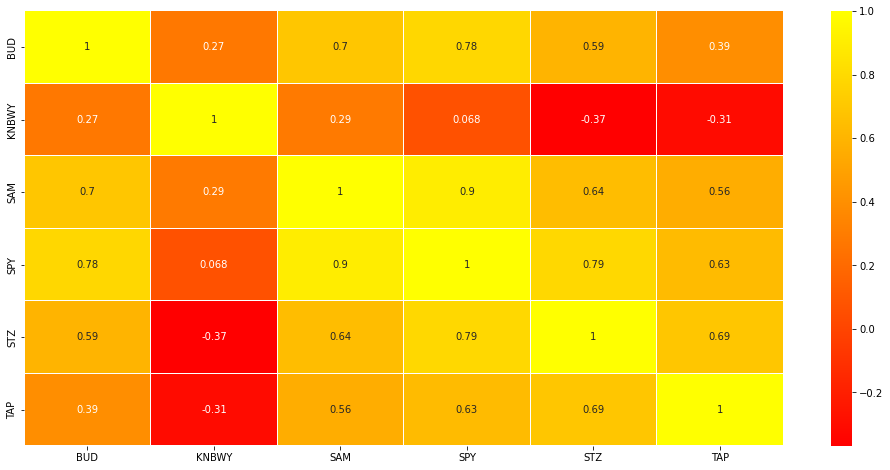

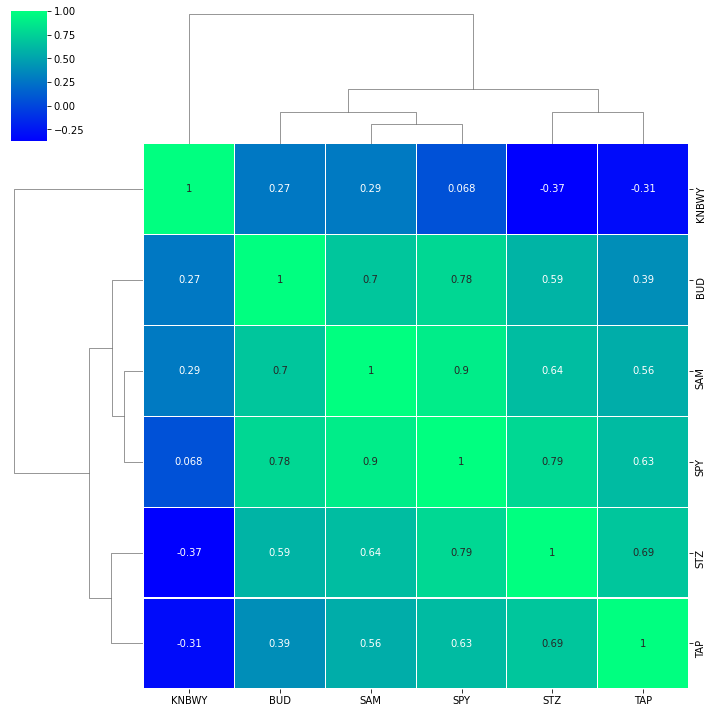

In [24]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [25]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [26]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [27]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------------------
90%                 [-0.03841503 -0.02658475 -0.03531652 -0.01766354 -0.01309801 -0.01881757]
95%                 [-0.04871642 -0.03245114 -0.04581992 -0.02324587 -0.01760637 -0.02452708]
99%                 [-0.06804013 -0.04345551 -0.06552256 -0.03371738 -0.02606331 -0.03523718]


In [28]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
BUD: -0.0384
KNBWY: -0.0266
SAM: -0.0353
SPY: -0.0177
STZ: -0.0131
TAP: -0.0188


In [29]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
BUD: $3839.9999999999995
KNBWY: $2660.0
SAM: $3530.0
SPY: $1770.0
STZ: $1310.0
TAP: $1880.0


In [30]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
BUD: $6800.000000000001
KNBWY: $4350.0
SAM: $6550.0
SPY: $3370.0
STZ: $2610.0
TAP: $3520.0
